# Motor current and vibration dataset for various faults in an E-motor-driven centrifugal pump #
Welcome to this notebook. In this notebook a difficult problem is presented. Could you predict the failure mode of a motor with it's electrical and vibration data?<br>
Some help is given at the begin. ***At the end some assignments are given!***


For a description of the original data see: https://www.sciencedirect.com/science/article/pii/S235234092301017X?via%3Dihub

To download an excel with a more detailed overview of the data: https://github.com/bbozon/DataScience/blob/main/measurement%20overview.xlsx <br>
(click the download button at the right )

I've added a fourier transform of the original data (the data is translated to the frequency domain).
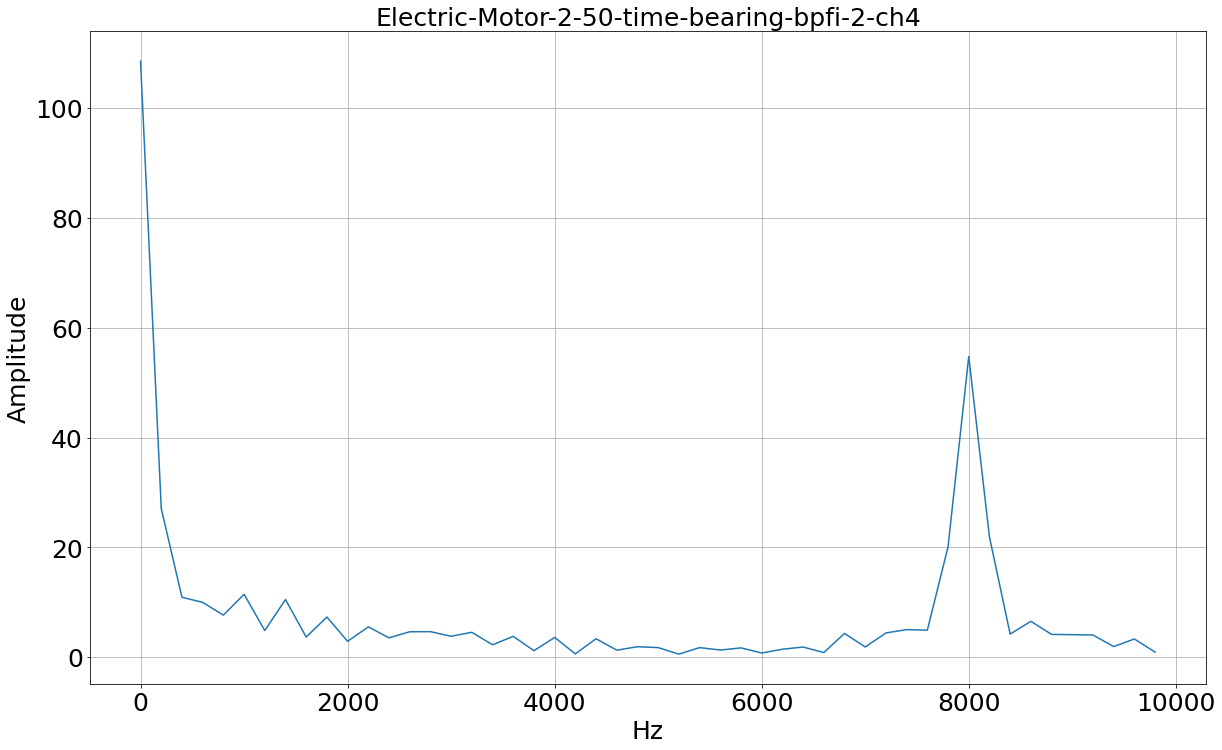

In the example below the frequency data is added as extra columns.

Written by Bart Bozon, please copy & use as you would like.

In [20]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/motor_data_electrical_and_vibration_time_and_frequency.csv'
df = pd.read_csv(url)
df

,num,file_name,motor_type,measurement_type,percentage_rated_speed,failure_mode,channels,0.0 [s],5e-05 [s],0.0001 [s],...,8000.0 [Hz],8200.0 [Hz],8400.0 [Hz],8600.0 [Hz],8800.0 [Hz],9000.0 [Hz],9200.0 [Hz],9400.0 [Hz],9600.0 [Hz],9800.0 [Hz]
0,0,Electric-Motor-2-100-time-bearing-bpfi-1-ch1,2,Electric,100,bearing-bpfi-1,ch1,12.538880,11.504028,11.892352,...,0.460920,0.505890,0.491107,0.478344,0.464159,0.460195,0.455085,0.445983,0.442841,0.444571
1,1,Electric-Motor-2-100-time-bearing-bpfi-1-ch2,2,Electric,100,bearing-bpfi-1,ch2,13.997547,14.728688,14.463031,...,0.281560,0.178401,0.175755,0.158460,0.148352,0.140856,0.131986,0.131468,0.136013,0.136019
2,2,Electric-Motor-2-100-time-bearing-bpfi-1-ch3,2,Electric,100,bearing-bpfi-1,ch3,-25.848821,-25.387859,-25.563526,...,0.486832,0.399209,0.327249,0.328707,0.322791,0.323270,0.323412,0.317095,0.311970,0.311122
3,3,Electric-Motor-2-100-time-bearing-bpfi-1-ch4,2,Electric,100,bearing-bpfi-1,ch4,-126.612758,-54.756134,-44.005587,...,8.222805,12.140835,7.765923,5.993686,4.849380,5.181368,5.188414,4.162534,3.393596,3.880727
4,4,Electric-Motor-2-100-time-bearing-bpfi-1-ch5,2,Electric,100,bearing-bpfi-1,ch5,280.423727,297.966561,280.213054,...,7.933788,2.230050,3.447050,2.596825,2.126454,1.815192,1.717921,1.534892,1.157102,0.935014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,7657,Vibration-Motor-4-70-time-unbalance-pump-3-ch1,4,Vibration,70,unbalance-pump-3,ch1,0.431913,0.030839,0.331461,...,0.097905,0.086127,0.037719,0.082455,0.158598,0.113416,0.132084,0.233835,0.108244,0.111489
7658,7658,Vibration-Motor-4-70-time-unbalance-pump-3-ch2,4,Vibration,70,unbalance-pump-3,ch2,0.121140,-0.163805,-0.110310,...,0.033157,0.028357,0.039017,0.006492,0.041775,0.060323,0.103699,0.192294,0.322833,0.419497
7659,7659,Vibration-Motor-4-70-time-unbalance-pump-3-ch3,4,Vibration,70,unbalance-pump-3,ch3,0.379044,-0.513494,0.479150,...,0.015550,0.018630,0.070879,0.121620,0.029988,0.030370,0.065686,0.152170,0.254682,0.550237
7660,7660,Vibration-Motor-4-70-time-unbalance-pump-3-ch4,4,Vibration,70,unbalance-pump-3,ch4,-0.211090,-0.318730,-0.272679,...,0.048559,0.015695,0.018430,0.011283,0.008598,0.009770,0.021162,0.016608,0.015716,0.030339


We'll try a simple model on a subset of the problem, we will look at motor 2 at 50% rated speed. We will use the vibration data of channel 3 as feature set.

In [21]:
# Drop all columns which end with [s]  (this drops the time series data)
# df = df.loc[:, ~df.columns.str.endswith('[s]')]

# We choose a number of conditions:
# df=df[df.channels== 'ch3']
# df=df[df.measurement_type== 'Vibration']
# df=df[df.motor_type== 2]
# df=df[df.percentage_rated_speed== 100]
# We do NOT have to do this, we could also include all data with "get_dummies"
df=pd.get_dummies(df, columns=['percentage_rated_speed'],drop_first=True)
df=pd.get_dummies(df, columns=['measurement_type'],drop_first=True)
df=pd.get_dummies(df, columns=['channels'],drop_first=True)
# Please note, if you do this you will have to remove the columns with .drop (see the next code cell)
df

,num,file_name,motor_type,failure_mode,0.0 [s],5e-05 [s],0.0001 [s],0.00015 [s],0.0002 [s],0.00025 [s],...,9800.0 [Hz],percentage_rated_speed_70,percentage_rated_speed_75,percentage_rated_speed_100,measurement_type_Vibration,channels_ch2,channels_ch3,channels_ch4,channels_ch5,channels_ch6
0,0,Electric-Motor-2-100-time-bearing-bpfi-1-ch1,2,bearing-bpfi-1,12.538880,11.504028,11.892352,10.351293,10.564528,9.886690,...,0.444571,False,False,True,False,False,False,False,False,False
1,1,Electric-Motor-2-100-time-bearing-bpfi-1-ch2,2,bearing-bpfi-1,13.997547,14.728688,14.463031,15.413559,15.456240,15.851912,...,0.136019,False,False,True,False,True,False,False,False,False
2,2,Electric-Motor-2-100-time-bearing-bpfi-1-ch3,2,bearing-bpfi-1,-25.848821,-25.387859,-25.563526,-25.004885,-25.122281,-24.993304,...,0.311122,False,False,True,False,False,True,False,False,False
3,3,Electric-Motor-2-100-time-bearing-bpfi-1-ch4,2,bearing-bpfi-1,-126.612758,-54.756134,-44.005587,-147.175401,-12.218162,-143.860824,...,3.880727,False,False,True,False,False,False,True,False,False
4,4,Electric-Motor-2-100-time-bearing-bpfi-1-ch5,2,bearing-bpfi-1,280.423727,297.966561,280.213054,300.906165,294.127295,294.631472,...,0.935014,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,7657,Vibration-Motor-4-70-time-unbalance-pump-3-ch1,4,unbalance-pump-3,0.431913,0.030839,0.331461,-0.037557,0.413793,-0.154287,...,0.111489,True,False,False,True,False,False,False,False,False
7658,7658,Vibration-Motor-4-70-time-unbalance-pump-3-ch2,4,unbalance-pump-3,0.121140,-0.163805,-0.110310,0.112128,-0.151980,0.290340,...,0.419497,True,False,False,True,True,False,False,False,False
7659,7659,Vibration-Motor-4-70-time-unbalance-pump-3-ch3,4,unbalance-pump-3,0.379044,-0.513494,0.479150,-0.757194,0.666642,-0.334525,...,0.550237,True,False,False,True,False,True,False,False,False
7660,7660,Vibration-Motor-4-70-time-unbalance-pump-3-ch4,4,unbalance-pump-3,-0.211090,-0.318730,-0.272679,0.275362,0.679231,0.207382,...,0.030339,True,False,False,True,False,False,True,False,False


In [19]:
X=df.drop(['num','file_name','motor_type','measurement_type',	'percentage_rated_speed','failure_mode','channels'],axis=1)
y=df['failure_mode']
# we always want to work with a training, validation and test data set
from sklearn.model_selection import train_test_split
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
pred = model.predict(X_validation)
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_validation, pred)
print ('accuracy is :',accuracy_score(y_validation, pred))

KeyError: "['measurement_type', 'percentage_rated_speed', 'channels'] not found in axis"

This is just an attempt. I bet YOU can do better...

1) Investigate the data in more detail. <br>
2) Can you get better results with a different selection of your input? E.g. different motor, different type of data (vibration/electrical), different measurement point (ch1-ch2-ch3-...)?<br>
3a) Read: https://medium.com/analytics-vidhya/categorical-encoding-with-pandas-get-dummies-d6f1ae6a3e06 <br>
3b) Can you get better results with "get_dummies"? So combining more data?<br>
4) Can you get better results with the time data set? <br>
4) Can you get better results with other models?<br>

You do not have to do the items sequentially, better yet, you can combine them. Do keep note of all your different results! It'easy to loose track...  


Observations:<br>
Motor type is always 2 in this data set.<br>
percentage_rated_speed is always 100 in this data set.<br>
channels is always ch3 in this data set.<br>

results:
adding dummies for percentage_rated_speed, measurement_type and channels gives an accuracy of 0.1121251629726206<br>
with time data added accuracy is 0.07431551499348109<br>
with SVC accuracy is 0.024771838331160364<br>

In [15]:
df

,num,file_name,motor_type,failure_mode,0.0 [Hz],200.0 [Hz],400.0 [Hz],600.0 [Hz],800.0 [Hz],1000.0 [Hz],...,9800.0 [Hz],percentage_rated_speed_70,percentage_rated_speed_75,percentage_rated_speed_100,measurement_type_Vibration,channels_ch2,channels_ch3,channels_ch4,channels_ch5,channels_ch6
0,0,Electric-Motor-2-100-time-bearing-bpfi-1-ch1,2,bearing-bpfi-1,16.844882,11.017908,7.581837,4.750075,3.553856,2.753421,...,0.444571,False,False,True,False,False,False,False,False,False
1,1,Electric-Motor-2-100-time-bearing-bpfi-1-ch2,2,bearing-bpfi-1,51.842045,4.700772,3.144240,1.677475,1.092655,0.606622,...,0.136019,False,False,True,False,True,False,False,False,False
2,2,Electric-Motor-2-100-time-bearing-bpfi-1-ch3,2,bearing-bpfi-1,32.810528,11.792757,4.657621,3.130682,2.492576,2.163947,...,0.311122,False,False,True,False,False,True,False,False,False
3,3,Electric-Motor-2-100-time-bearing-bpfi-1-ch4,2,bearing-bpfi-1,471.044105,87.533989,48.966827,28.212239,18.734087,16.238956,...,3.880727,False,False,True,False,False,False,True,False,False
4,4,Electric-Motor-2-100-time-bearing-bpfi-1-ch5,2,bearing-bpfi-1,529.581744,73.521096,29.291336,18.952707,14.305417,10.414943,...,0.935014,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,7657,Vibration-Motor-4-70-time-unbalance-pump-3-ch1,4,unbalance-pump-3,0.099998,0.144606,0.052299,0.045662,0.018461,0.003335,...,0.111489,True,False,False,True,False,False,False,False,False
7658,7658,Vibration-Motor-4-70-time-unbalance-pump-3-ch2,4,unbalance-pump-3,0.065417,0.024108,0.044198,0.019218,0.026220,0.030001,...,0.419497,True,False,False,True,True,False,False,False,False
7659,7659,Vibration-Motor-4-70-time-unbalance-pump-3-ch3,4,unbalance-pump-3,0.012509,0.086105,0.032866,0.035562,0.006748,0.033097,...,0.550237,True,False,False,True,False,True,False,False,False
7660,7660,Vibration-Motor-4-70-time-unbalance-pump-3-ch4,4,unbalance-pump-3,0.168900,0.038187,0.221991,0.198148,0.066965,0.032456,...,0.030339,True,False,False,True,False,False,True,False,False


accuracy is : 0.07431551499348109


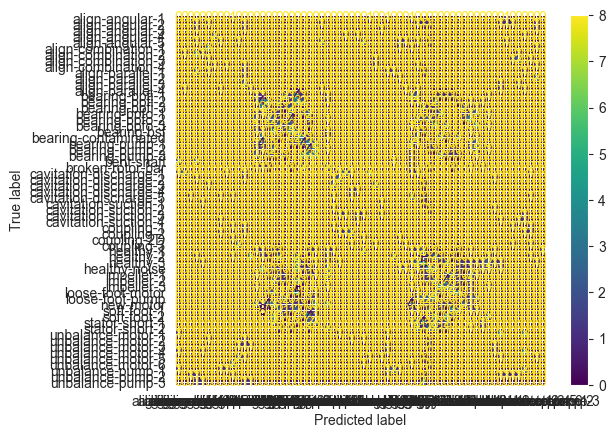

In [22]:
X=df.drop(['num','file_name',"failure_mode"],axis=1)
y=df['failure_mode']
# we always want to work with a training, validation and test data set
from sklearn.model_selection import train_test_split
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
pred = model.predict(X_validation)

from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_validation, pred)
print ('accuracy is :',accuracy_score(y_validation, pred))

accuracy is : 0.024771838331160364


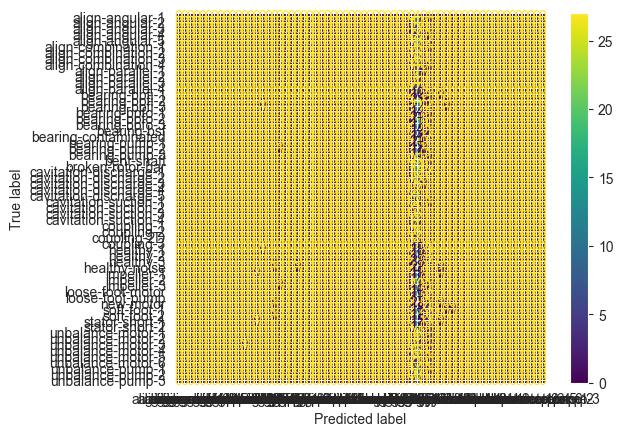

In [23]:
X=df.drop(['num','file_name',"failure_mode"],axis=1)
y=df['failure_mode']
# we always want to work with a training, validation and test data set
from sklearn.model_selection import train_test_split
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)

# Try a different model
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_validation)
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_validation, pred)
print ('accuracy is :',accuracy_score(y_validation, pred))